# Ryan Chan - Farmlink EDA

In [17]:
from matplotlib import pyplot as plt

%matplotlib inline

import pandas as pd
import plotly.express as px
import numpy as np
import re
import ast
import json
import math

df = pd.read_csv('Farmlink.csv')
df

,id,status,Sends,Opens,Clicks,lifetodategiving,yeartodategiving,lastgiftamount,lastgiftdate,ContactType,MonetaryTier,DonorStatus,IndividualDonorType,Tier3Classification
0,c3bbc3140962170f3cbf11f3d4064b5c,unsubscribed,103,19,1,208,0,1,7/17/2020,Donor,Silver,SingleDonor,Multiple Single Donations,Multiple Single Donations
1,4952c138fb131d36003b38f742ac2733,subscribed,103,84,2,0,0,0,NaN,Non-Donor,NaN,NaN,NaN,NaN
2,7244ab4036d24fd2560de91a281485ac,subscribed,113,122,0,500,0,500,4/28/2020,Donor,Platinum,SingleDonor,Single Donor,Single Donor
3,ca8f96d7edb2ff654be07db2ebbd98c2,subscribed,112,244,4,0,0,517,2/5/2021,Donor,Platinum,SingleDonor,Multiple Single Donations,Multiple Single Donations
4,e3cd0764e745f7baa17c5b2fb6682fde,subscribed,112,69,0,500,0,500,4/30/2020,Donor,Platinum,SingleDonor,Single Donor,Single Donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18367,1aaa8cc332263bd5c2b43d5b33c8831d,subscribed,109,252,19,210,0,210,8/17/2020,Donor,Platinum,SingleDonor,Single Donor,Single Donor
18368,fcd682fc8b6786279f5feec131b02b8f,subscribed,103,80,10,0,0,0,NaN,Non-Donor,NaN,NaN,NaN,NaN
18369,17f59717c69ed9b0e1076d343da875a7,subscribed,104,167,7,0,0,0,NaN,Non-Donor,NaN,NaN,NaN,NaN
18370,b9a5e29d05e34efd24593da8d5ee52da,subscribed,111,79,10,17,0,17,8/8/2020,Donor,Silver,SingleDonor,Single Donor,Single Donor


In [18]:
#summary statistics

df.describe()
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18372 entries, 0 to 18371
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   18372 non-null  object
 1   status               18372 non-null  object
 2   Sends                18372 non-null  int64 
 3   Opens                18372 non-null  int64 
 4   Clicks               18372 non-null  int64 
 5   lifetodategiving     18372 non-null  int64 
 6   yeartodategiving     18372 non-null  int64 
 7   lastgiftamount       18372 non-null  int64 
 8   lastgiftdate         10704 non-null  object
 9   ContactType          18372 non-null  object
 10  MonetaryTier         11024 non-null  object
 11  DonorStatus          11024 non-null  object
 12  IndividualDonorType  10705 non-null  object
 13  Tier3Classification  10759 non-null  object
dtypes: int64(6), object(8)
memory usage: 2.0+ MB


id                        0
status                    0
Sends                     0
Opens                     0
Clicks                    0
lifetodategiving          0
yeartodategiving          0
lastgiftamount            0
lastgiftdate           7668
ContactType               0
MonetaryTier           7348
DonorStatus            7348
IndividualDonorType    7667
Tier3Classification    7613
dtype: int64

In [19]:
#69% of the users are subscribed
len(df[df['status'] == 'subscribed']) / len(df) * 100

69.04528630524712

In [20]:
#cleaning the data a little

len(df[df['status'] == 'subscribed']) / len(df) * 100

#delete people if they are unsubscribed and aren't donors
for index, row in df.iterrows():
    if row['status'] == 'unsubscribed' and row['ContactType'] == 'Non-Donor':
        df.drop(index, inplace=True)

df

,id,status,Sends,Opens,Clicks,lifetodategiving,yeartodategiving,lastgiftamount,lastgiftdate,ContactType,MonetaryTier,DonorStatus,IndividualDonorType,Tier3Classification
0,c3bbc3140962170f3cbf11f3d4064b5c,unsubscribed,103,19,1,208,0,1,7/17/2020,Donor,Silver,SingleDonor,Multiple Single Donations,Multiple Single Donations
1,4952c138fb131d36003b38f742ac2733,subscribed,103,84,2,0,0,0,NaN,Non-Donor,NaN,NaN,NaN,NaN
2,7244ab4036d24fd2560de91a281485ac,subscribed,113,122,0,500,0,500,4/28/2020,Donor,Platinum,SingleDonor,Single Donor,Single Donor
3,ca8f96d7edb2ff654be07db2ebbd98c2,subscribed,112,244,4,0,0,517,2/5/2021,Donor,Platinum,SingleDonor,Multiple Single Donations,Multiple Single Donations
4,e3cd0764e745f7baa17c5b2fb6682fde,subscribed,112,69,0,500,0,500,4/30/2020,Donor,Platinum,SingleDonor,Single Donor,Single Donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18367,1aaa8cc332263bd5c2b43d5b33c8831d,subscribed,109,252,19,210,0,210,8/17/2020,Donor,Platinum,SingleDonor,Single Donor,Single Donor
18368,fcd682fc8b6786279f5feec131b02b8f,subscribed,103,80,10,0,0,0,NaN,Non-Donor,NaN,NaN,NaN,NaN
18369,17f59717c69ed9b0e1076d343da875a7,subscribed,104,167,7,0,0,0,NaN,Non-Donor,NaN,NaN,NaN,NaN
18370,b9a5e29d05e34efd24593da8d5ee52da,subscribed,111,79,10,17,0,17,8/8/2020,Donor,Silver,SingleDonor,Single Donor,Single Donor


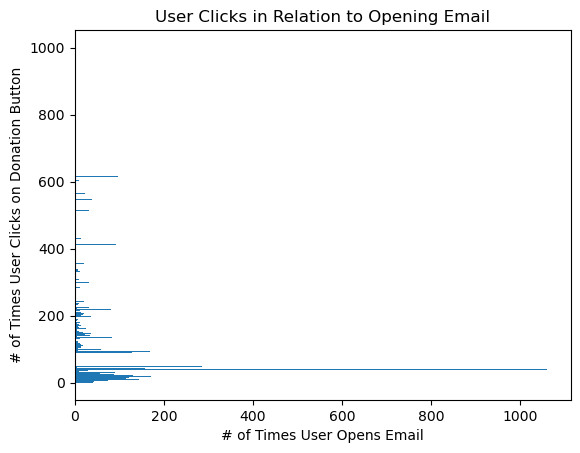

In [36]:
#data visualizations

#User clicks on donations in relation to opening the email
plt.barh(df['Opens'], df['Clicks'])
plt.xlabel('# of Times User Opens Email')
plt.ylabel('# of Times User Clicks on Donation Button')
plt.title('User Clicks in Relation to Opening Email')

plt.show()
